In [203]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
#Reading csv
dataset = pd.read_csv("TelCustomerChurn.csv")

In [205]:
replace_cols = ['OnlineSecurity',
                'TechSupport','StreamingTV']
for col in replace_cols:
    dataset[col] = dataset[col].replace({'No internet service': 'No'})

In [206]:
replace_cols1 = ['MultipleLines']
for col in replace_cols1:
    dataset[col] = dataset[col].replace({'Nophoneservice': 'No'})

In [207]:

#dropPing_the_CustomerId_column
dataset1=dataset.drop(['customerID'],axis=1)
dataset1.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,2,Yes,No,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,45,No,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [208]:
#Converting Categorical to Numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [209]:
dataset1['gender'] = le.fit_transform(dataset1['gender'])
dataset1['tenure'] = le.fit_transform(dataset1['tenure'])
dataset1['PhoneService'] = le.fit_transform(dataset1['PhoneService'])
dataset1['MultipleLines'] = le.fit_transform(dataset1['MultipleLines'])
dataset1['InternetService'] = le.fit_transform(dataset1['InternetService'])
dataset1['OnlineSecurity'] = le.fit_transform(dataset1['OnlineSecurity'])
dataset1['TechSupport'] = le.fit_transform(dataset1['TechSupport'])
dataset1['StreamingTV'] = le.fit_transform(dataset1['StreamingTV'])
dataset1['Contract'] = le.fit_transform(dataset1['Contract'])
dataset1['PaymentMethod'] = le.fit_transform(dataset1['PaymentMethod'])
dataset1['MonthlyCharges'] = le.fit_transform(dataset1['MonthlyCharges'])
dataset1['TotalCharges'] = le.fit_transform(dataset1['TotalCharges'])
dataset1['Churn'] = le.fit_transform(dataset1['Churn'])

In [210]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
gender             7043 non-null int32
tenure             7043 non-null int64
PhoneService       7043 non-null int32
MultipleLines      7043 non-null int32
InternetService    7043 non-null int32
OnlineSecurity     7043 non-null int32
TechSupport        7043 non-null int32
StreamingTV        7043 non-null int32
Contract           7043 non-null int32
PaymentMethod      7043 non-null int32
MonthlyCharges     7043 non-null int64
TotalCharges       7043 non-null int32
Churn              7043 non-null int32
dtypes: int32(11), int64(2)
memory usage: 412.8 KB


In [211]:
dataset1.shape

(7043, 13)

In [212]:
dataset1.describe(include = 'all')

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,32.371149,0.903166,0.421837,0.872923,0.286668,0.290217,0.384353,0.690473,1.574329,683.524776,3257.794122,0.265370
std,0.500013,24.559481,0.295752,0.493888,0.737796,0.452237,0.453895,0.486477,0.833755,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,1.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,722.000000,3249.000000,0.000000
75%,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1584.000000,6530.000000,1.000000


In [213]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.0,0.0,1.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
MultipleLines,7043.0,0.421837,0.493888,0.0,0.0,0.0,1.0,1.0
InternetService,7043.0,0.872923,0.737796,0.0,0.0,1.0,1.0,2.0
OnlineSecurity,7043.0,0.286668,0.452237,0.0,0.0,0.0,1.0,1.0
TechSupport,7043.0,0.290217,0.453895,0.0,0.0,0.0,1.0,1.0
StreamingTV,7043.0,0.384353,0.486477,0.0,0.0,0.0,1.0,1.0
Contract,7043.0,0.690473,0.833755,0.0,0.0,0.0,1.0,2.0
PaymentMethod,7043.0,1.574329,1.068104,0.0,1.0,2.0,2.0,3.0


[]

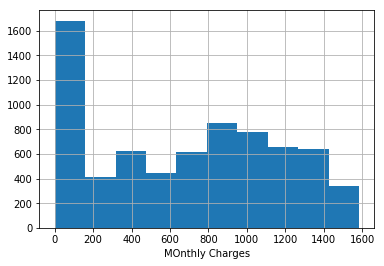

In [214]:
#HIstograms
dataset1.MonthlyCharges.hist()
plt.xlabel("MOnthly Charges")
plt.plot()

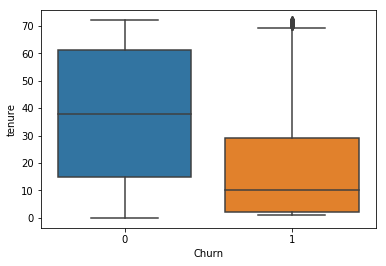

In [215]:
sns.boxplot(x='Churn', y='tenure', data=dataset1)

In [216]:
#plt.subplots_adjust(wspace = 0.3)
#sns.countplot(data = new_df, x = "SeniorCitizen", hue = "Churn", ax = axs[0])
#sns.countplot(data = new_df, x = "MultipleLines_No phone service", hue = "Churn", ax = axs[1])

In [217]:
dataset1['MonthlyCharges'].describe()

count    7043.000000
mean      683.524776
std       478.511521
min         0.000000
25%       199.000000
50%       722.000000
75%      1090.000000
max      1584.000000
Name: MonthlyCharges, dtype: float64

In [218]:
dataset1['MonthlyCharges'].skew()

0.014262797942790143

In [219]:

#dropPing_the_CustomerId_column
dataset3=dataset1.drop(['gender','PhoneService','MultipleLines','InternetService','OnlineSecurity','TechSupport','StreamingTV','Contract','PaymentMethod'],axis=1)
dataset3.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,142,2505,0
1,34,498,1466,0
2,2,436,157,1
3,45,266,1400,0
4,2,729,925,1


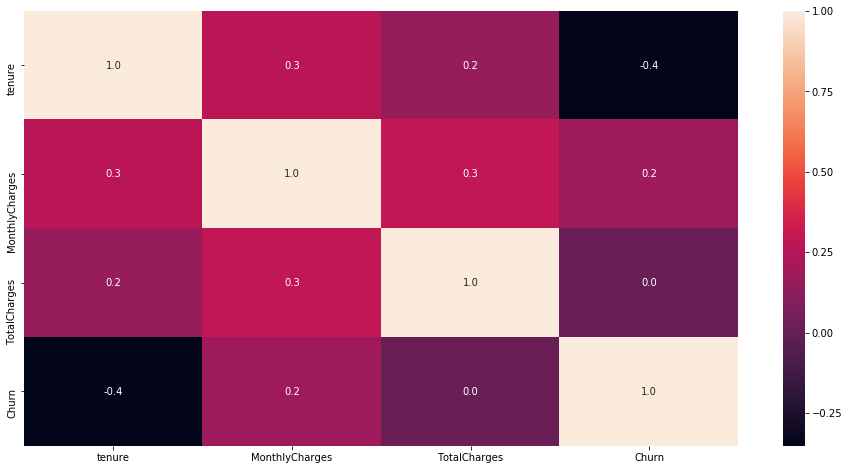

In [220]:
plt.figure(figsize = (16, 8))
sns.heatmap(dataset3.corr(), annot=True, fmt=".1f")
plt.show()

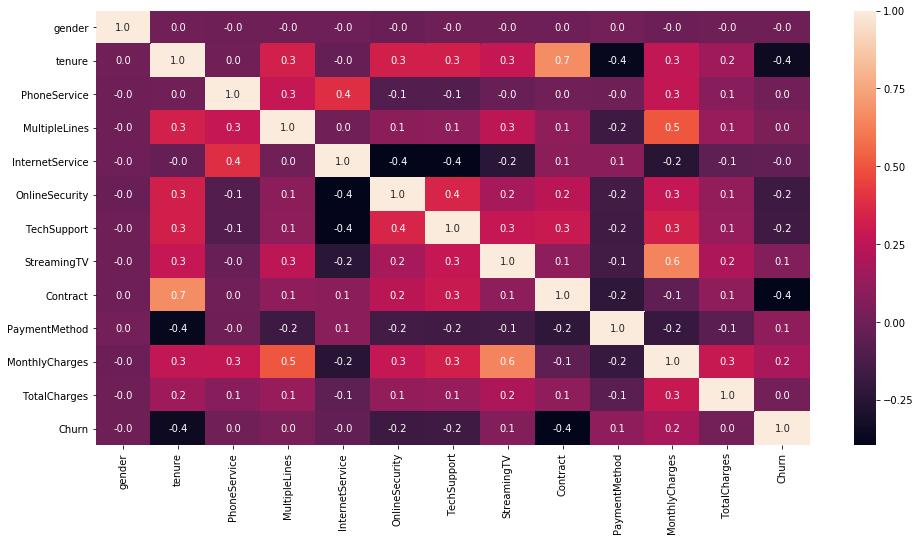

In [221]:
plt.figure(figsize = (16, 8))
sns.heatmap(dataset1.corr(), annot=True, fmt=".1f")
plt.show()

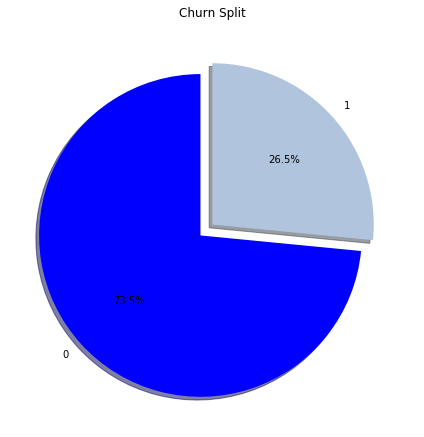

In [222]:
from collections import Counter


labels, values = zip(*Counter(dataset1["Churn"]).items())
colors = ['blue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

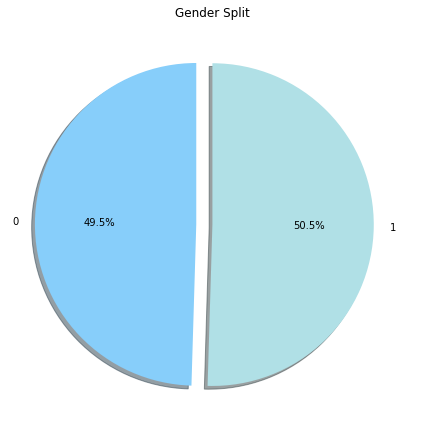

In [223]:
labels, values = zip(*Counter(dataset1["gender"]).items())
colors = ['lightskyblue', 'powderblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()


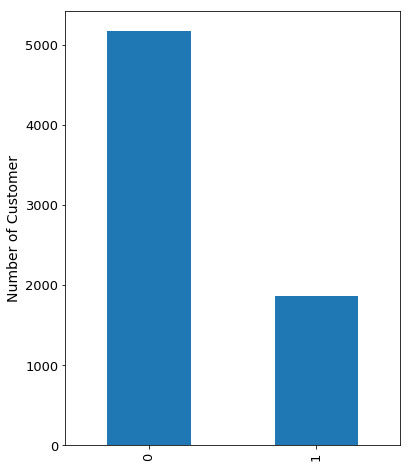

In [224]:
ax = dataset1["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

In [225]:
#takingtime
#_, ax = plt.subplots(1, 2, figsize= (16, 6))
#sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=dataset1, ax=ax[0])
#sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=dataset1, ax=ax[1])

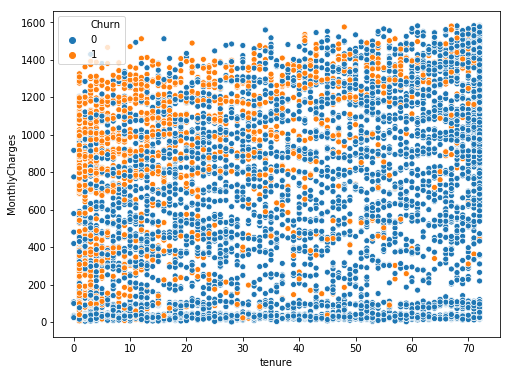

In [226]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', hue="Churn", data = dataset1)

In [227]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue="Churn", data = dataset1)

D:\Program files(NOn andriod)\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


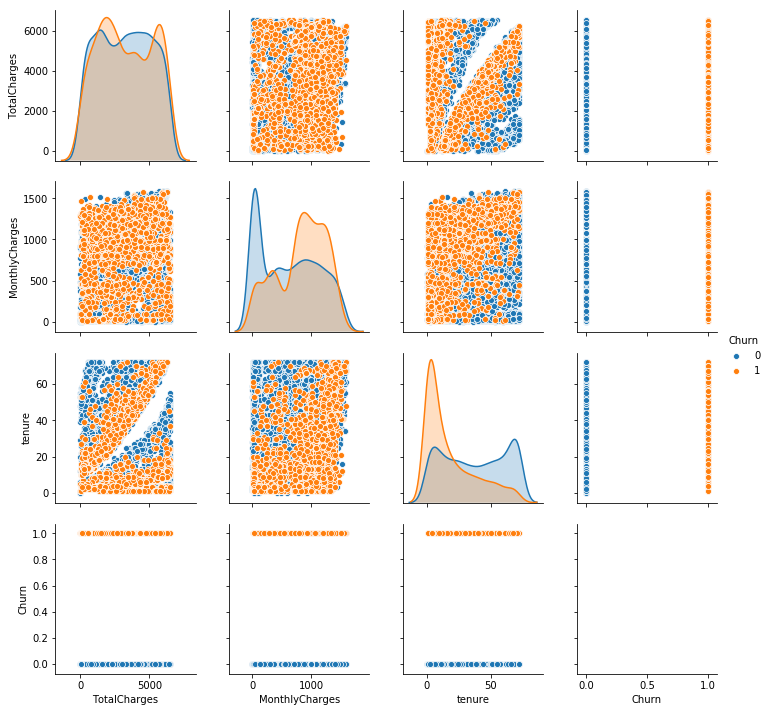

In [228]:
cols = ["TotalCharges", "MonthlyCharges", "tenure", "Churn"] 
pairplot_feature = dataset1[cols]
sns.pairplot(pairplot_feature, hue = "Churn")

In [229]:
x = dataset1.iloc[:,0:13].values
y = dataset1.iloc[:,-1].values


In [230]:
print(y)
#print(dataset1.iloc[:,6])

[0 0 1 ... 0 1 0]


In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [232]:
#x_test.shape

In [233]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5,random_state = 10)

classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[2589,   26],
       [ 815,   92]], dtype=int64)

In [234]:
accuracy1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy1)

Accuracy: 0.7612152186257808


In [235]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7796610169491526
Recall: 0.10143329658213891


In [236]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.545745328979406

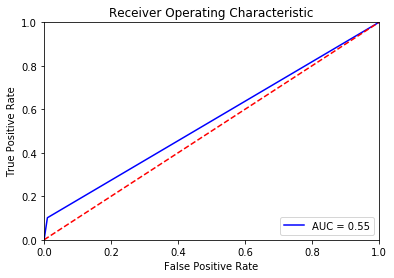

In [237]:
#plotting the roc scalar
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [186]:
#Knn
#from mpl_toolkits import mplot3d
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(x_test[:,0], x_test[:,1], y_test, 'gray')
#
#
## Fitting K-NN to the Training set
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
#classifier.fit(x_train, y_train)
#
## Predicting the Test set results
#y_pred = classifier.predict(x_test)
#
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_pred)
## Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#
#import sklearn.metrics as metrics
#fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
#roc_auc = metrics.auc(fpr, tpr)
#print(roc_auc)
#
#
#import matplotlib.pyplot as plt
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()



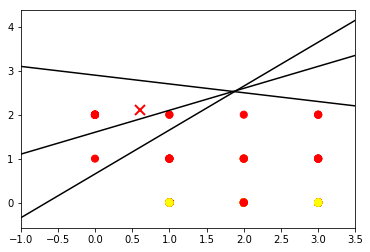

In [187]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 1], x[:, 8], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);